### Testing the Performance of Bubble, Insertion Sort, and Selection.
The data consists of the following columns:
- `SortType` - The sorting algorithm: bubble sort, selection sort, insertion sort.
- `ArrayType` - The integer array type used during the test. 
    - `Random` - As the name implies, the values in the array were in a random order.
    - `Increasing` - The values in the array were in ascending order.
    - `IncreasingAndRandom` - 90% of the values were in ascending order, and the remaining in a random order.
    - `Decreasing` - The values in the array were in descending order.
    - `Equal` - The values in the array were all the same.
- `ArraySize` - The size of the array used during the test.
    - `10000` - Integer array containing 10,000 elements.
    - `25000` - Integer array containing 25,000 elements.
    - `50000` - Integer array containing 50,000 elements.
    - `100000` - Integer array containing 100,000 elements.
- `Test`# - The time it took in **milliseconds** to sort the array.
- `AverageTime` - The average time of all the tests.
- `MemoryUsage` - The average memory usage.

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

Increase the display size of all graphs by `factor`.

In [2]:
factor = 1.2
default_dpi = mpl.rcParamsDefault['figure.dpi']
mpl.rcParams['figure.dpi'] = default_dpi * factor

### The data
Each row represents an observation: nine tests were performed per row.

The `Test` columns represents the time it took each respective algorithm to sort the given array in **milliseconds**.

The average memory usage is in **megabytes**¹.

¹ Converted from bytes using the binary (base 2) system as opposed to the SI system.

In [3]:
tests = pd.read_csv("sort_tests.csv")
tests

,SortType,ArrayType,ArraySize,Test1,Test2,Test3,Test4,Test5,Test6,Test7,Test8,Test9,AverageTime,MemoryUsage
0,BubbleSort,Equal,10000,2.100887,1.816844,1.734940,1.653783,1.620458,1.646332,1.654642,1.675758,0.395732,1.588819,2.17226
1,BubbleSort,Equal,25000,0.344438,0.342302,0.340168,0.341084,0.273704,0.343259,0.340629,0.346424,0.286490,0.328722,5.53298
2,BubbleSort,Equal,50000,0.669300,0.714362,0.750050,0.751582,0.724130,0.845181,0.480185,0.509878,0.512997,0.661962,7.16717
3,BubbleSort,Equal,100000,0.983173,0.811248,0.910891,0.922530,0.944618,0.962387,0.922943,1.047562,0.937066,0.938046,12.13935
4,BubbleSort,Random,10000,1423.721529,1615.646777,1636.998131,1733.617812,1699.408568,1608.589898,1640.827512,1584.911188,1805.414216,1638.792847,44.33807
5,BubbleSort,Random,25000,17820.525435,14897.161279,14086.136214,12153.546143,13017.104881,16598.033997,16510.642676,15338.869148,17002.808605,15269.425375,78.33508
6,BubbleSort,Random,50000,92502.936111,72313.872971,60330.164272,66429.312906,66336.374407,62790.397230,67761.572618,66051.570752,63835.811092,68705.779151,70.42398
7,BubbleSort,Random,100000,267902.873662,330858.314055,351393.330513,356742.938208,381057.021634,385180.364030,374069.504284,344426.077008,371334.521629,351440.549447,136.67549
8,BubbleSort,Increasing,10000,0.120689,0.142236,0.168250,0.139213,0.133302,0.125839,0.138850,0.139291,0.142248,0.138879,209.02943
9,BubbleSort,Increasing,25000,0.352865,0.260573,0.353962,0.307230,0.354571,0.339063,0.341304,0.345099,0.384553,0.337691,212.20583


### Lowest and highest time averages.
The rows with the best and worse time averages.

In [4]:
columns = ["SortType", "ArrayType", "ArraySize", "AverageTime", "MemoryUsage"]

In [5]:
# best time
tests.iloc[tests["AverageTime"].idxmin()][columns]

SortType       BubbleSort
ArrayType      Increasing
ArraySize           10000
AverageTime      0.138879
MemoryUsage       209.029
Name: 8, dtype: object

In [6]:
# worst time
tests.iloc[tests["AverageTime"].idxmax()][columns]

SortType       BubbleSort
ArrayType          Random
ArraySize          100000
AverageTime        351441
MemoryUsage       136.675
Name: 7, dtype: object

### Best Overall Performance
By taking the the mean of all the averages, it is possible to find which algorithm had the best overall performance.

In [7]:
tests.groupby("SortType").mean()["AverageTime"]

SortType
BubbleSort       54326.305677
InsertionSort     5574.331951
SelectionSort     8750.436439
Name: AverageTime, dtype: float64

In [8]:
tests.groupby("SortType").mean()["MemoryUsage"]

SortType
BubbleSort       111.433485
InsertionSort     47.357020
SelectionSort     46.084478
Name: MemoryUsage, dtype: float64

**What does this data mean?**

Bubble sort had the worse overall time performance, but the lowest memory usage. Insertion sort performed the best across the board given a variety of array types. Although, selection sort had the highest time performance and memory usage, its performance is comparable to insertion sort.

### Visual Analysis

This function definition facilitates plotting bar charts of the data.

In [9]:
"""
param:
    group - variable to display on the vertical axis
    col - the color of the bars in the chart
"""

def plot_average_time_chart(df, group, col):
    means_of_groups = df.groupby(group).mean()
    means_of_groups["AverageTime"].plot(kind = "barh", color = col)
    plt.annotate("Lower is better", xy = (1.0, -0.2), xycoords = "axes fraction",
                 ha = "right", va = "center", fontsize = 10)

#### Average Time

Text(0.5,0,'Average Time (milliseconds)')

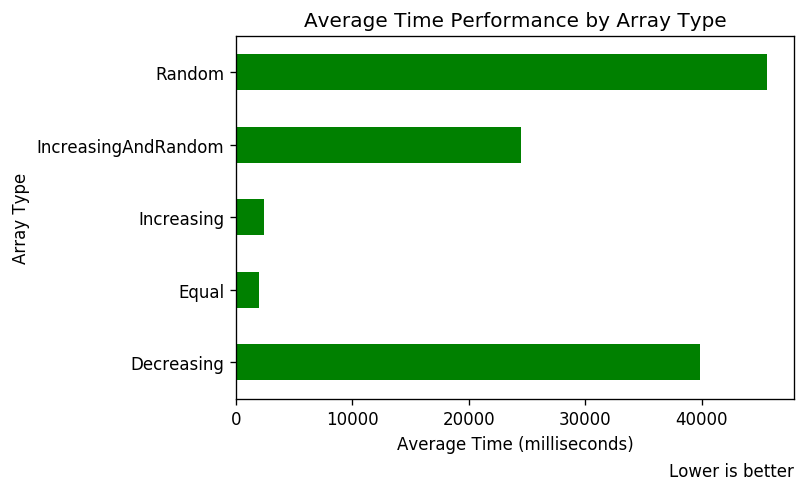

In [10]:
plot_average_time_chart(tests, "ArrayType", "green")
plt.title("Average Time Performance by Array Type")
plt.ylabel("Array Type")
plt.xlabel("Average Time (milliseconds)")

All three sorting algorithms did well with `Equal` and `Increasing` array types. This is due to these arrays already being sorted. 

Additionally, it is also worth noting that `Random` arrays have the worse average time by a few hundreds milliseconds. The algorithms sorted every array in ascending order, as such, an array with all elements in descending order is the worse case scenario because the sorting algorithm has to move every element in the array thus executing the maximum number of operations. The bar chart shows surprising results because in a randomly ordered array, on average, one would expect most elements to be out of order but there should be at least some elements in the right order. Hence, I was expecting the `Random` and `Decreasing` bars in the bar chart to be trading places.

However, on closer inspection, my implementation of the `Decreasing` integer array used a for-loop to decrement an initial random value by one for `ArraySize` number of times. Hence, the array was in sequential descending order. I suspect this is the reason for unexpected results, that is, although the sorting algorithms had to move every element in the array, but since the array was in sequential descending order, for every iteration, the number of comparisons the algorithms made was linear, whereas, with the random array, there was no pattern.

Text(0.5,0,'Average Time (milliseconds)')

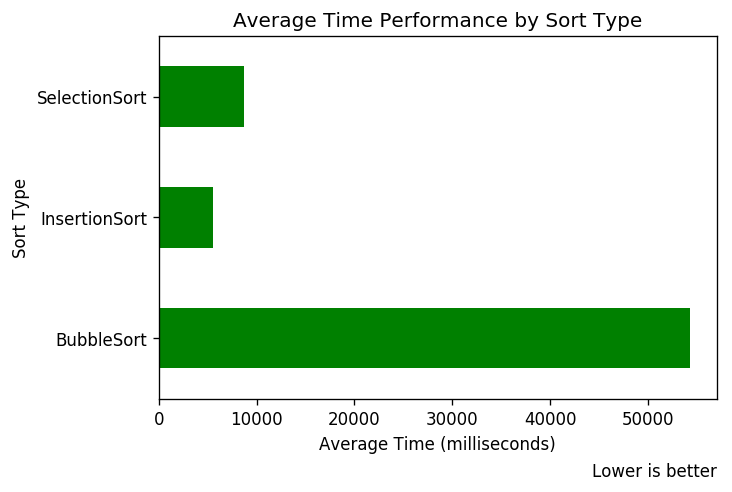

In [11]:
plot_average_time_chart(tests, "SortType", "green")
plt.title("Average Time Performance by Sort Type")
plt.ylabel("Sort Type")
plt.xlabel("Average Time (milliseconds)")

Bubble sort had the worse average time. On the other hand, the selection and insertion sort approach works better for sorting arrays arranged in various order.

In [12]:
bubble = tests[(tests["SortType"] == "BubbleSort")]
insertion = tests[(tests["SortType"] == "InsertionSort")]
selection = tests[(tests["SortType"] == "SelectionSort")]

Text(0.5,0,'Average Time (milliseconds)')

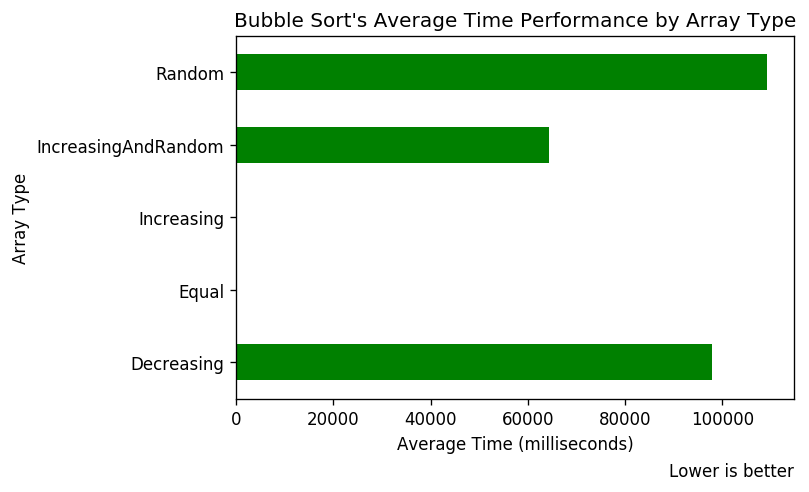

In [13]:
plot_average_time_chart(bubble, "ArrayType", "green")
plt.title("Bubble Sort's Average Time Performance by Array Type")
plt.ylabel("Array Type")
plt.xlabel("Average Time (milliseconds)")

Text(0.5,0,'Average Time (milliseconds)')

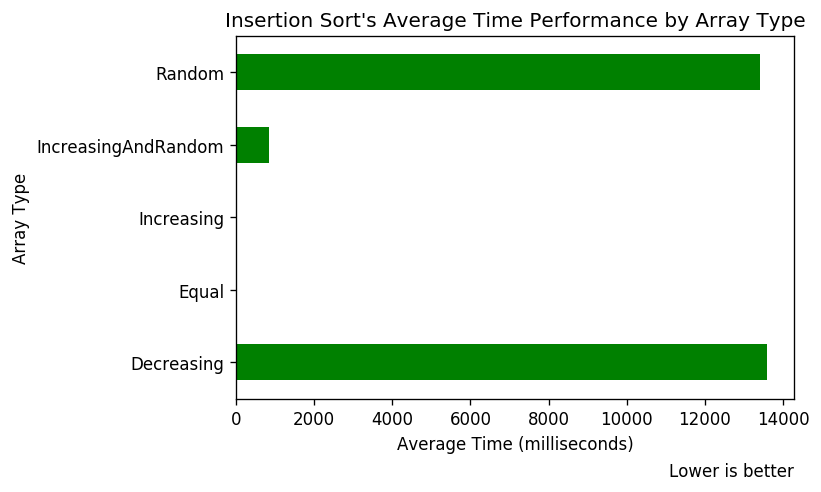

In [14]:
plot_average_time_chart(insertion, "ArrayType", "green")
plt.title("Insertion Sort's Average Time Performance by Array Type")
plt.ylabel("Array Type")
plt.xlabel("Average Time (milliseconds)")

Text(0.5,0,'Average Time (milliseconds)')

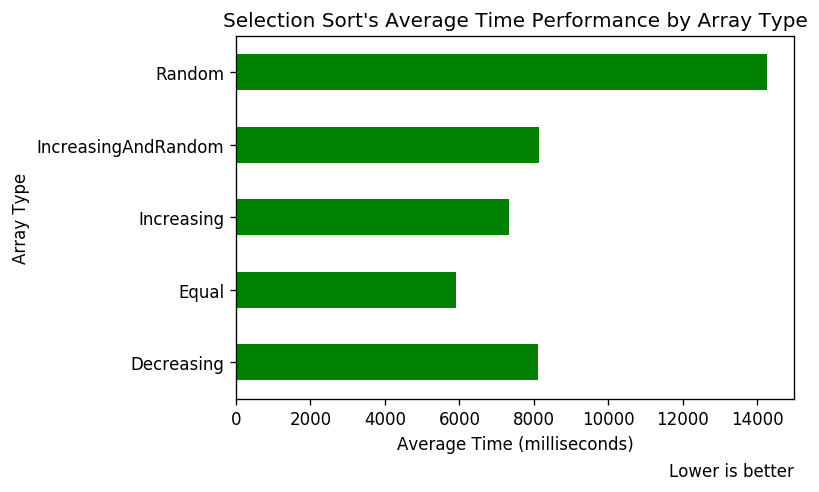

In [15]:
plot_average_time_chart(selection, "ArrayType", "green")
plt.title("Selection Sort's Average Time Performance by Array Type")
plt.ylabel("Array Type")
plt.xlabel("Average Time (milliseconds)")

As you might have noticed, bubble and insertion sort performed exceptionally well with equal and increasing array types, yet selection sort not so much. There is a very good reason for it. Due to the nature of bubble and insertion sort, it is possible to terminate the operation as soon as the array has been sorted. In the case of bubble sort, for every iteration, the algorithm keeps track if a swap occurred, and of not, it means the array is sorted and the algorithm terminates immidiately. The same is true of insertion sort.

Moreover, insertion sort performed considerably better than selection sort with sorted and mostly sorted arrays, but selection sort did better than insertion sort with decreasing arrays. Their performance was comparable with random arrays.

Text(0.5,0,'Average Time (milliseconds)')

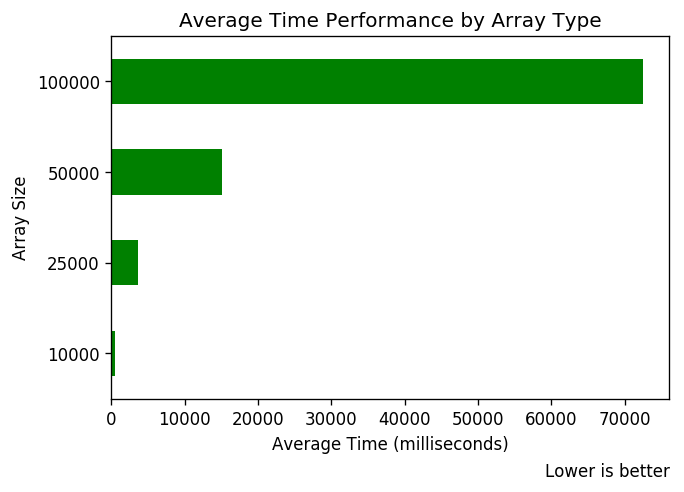

In [16]:
plot_average_time_chart(tests, "ArraySize", "green")
plt.title("Average Time Performance by Array Type")
plt.ylabel("Array Size")
plt.xlabel("Average Time (milliseconds)")

All three algorithms share an exponential time complexity described by N². These results demonstrate, despite all three algorithms sharing the same time complexity, their performance varies considerably depending on the order of the data. Each algorithm has strengths and weaknesses, and although on average their performed can be explained by N², it is possible to get lower average times by playing to the algorithm strengths.

#### Memory Usage

This function definition facilitates plotting bar charts of the data.

In [17]:
"""
param:
    group - variable to display on the vertical axis
    col - the color of the bars in the chart
"""

def plot_memory_usage_chart(df, group, col):
    means_of_groups = df.groupby(group).mean()
    means_of_groups["MemoryUsage"].plot(kind = "barh", color = col)
    plt.annotate("Lower is better", xy = (1.0, -0.2), xycoords = "axes fraction",
                 ha = "right", va = "center", fontsize = 10)

Text(0.5,0,'Average Memory Usage (megabytes)')

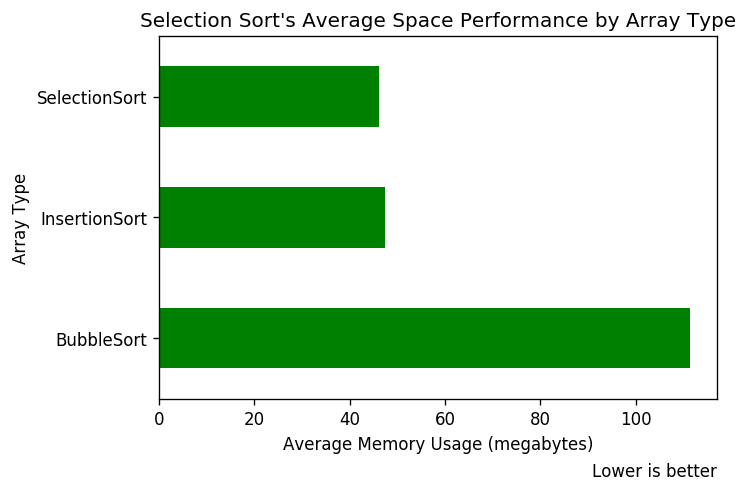

In [18]:
plot_memory_usage_chart(tests, "SortType", "green")
plt.title("Selection Sort's Average Space Performance by Array Type")
plt.ylabel("Array Type")
plt.xlabel("Average Memory Usage (megabytes)")

### Best Overall Performance
By taking the the mean of all the averages, we can figure out which algorithm had the best overall performance.

In [ ]:
tests.groupby("SortType").mean()["AverageTime"]

In [ ]:
tests.groupby("SortType").mean()["MemoryUsage"]

In [ ]:
# index 0, 1, and 2 corresponds to bubble, insertion, and selection sort respectively
def taverage(index):
    return tests.groupby("SortType").mean()["AverageTime"][index]
def musage(index):
    return tests.groupby("SortType").mean()["MemoryUsage"][index]

In [ ]:
print("Insertion sort was %.1fx faster than bubble sort." %(taverage(0) / taverage(1)))
print("Insertion sort was %.1fx faster than selection sort." %(taverage(2) / taverage(1)))
print("Selection sort was %.1fx faster than bubble sort." %(taverage(0) / taverage(2)))